# Eye of the Emergency

Les plateformes de médias sociaux sont aujourd’hui devenues une partie intégrante de
nos vies, nous fournissant des informations en temps réel sur les événements qui se
produisent autour de nous. Toutefois, cet essor s'est accompagné d'une augmentation
de la désinformation et des "fake news". En cas de catastrophe ou de crise, ces fausses
informations peuvent être particulièrement dangereuses, car elles peuvent entraver les
efforts d'intervention d'urgence et provoquer la panique au sein de la population.

**Sommaire**
1. data 
1. EDA
1. algorithm 
1. conclusion 

## DATA

In [1]:
import pandas as pd
import missingno as msno 

from wordcloud import WordCloud as WC
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_test = pd.read_csv('test_tweets.csv', sep = ',')
df_train = pd.read_csv('train_tweets.csv', sep = ',')

In [3]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [4]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [6]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
df_test.isnull()

,id,keyword,location,text
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False
...,...,...,...,...
3258,False,True,True,False
3259,False,True,True,False
3260,False,True,True,False
3261,False,True,True,False


In [10]:
df_test.isnull()

,id,keyword,location,text
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False
...,...,...,...,...
3258,False,True,True,False
3259,False,True,True,False
3260,False,True,True,False
3261,False,True,True,False


In [11]:
df_test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [12]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


étrange le résultat du describe il ne prend que en comte le int 

j'ai l'impression que les columns (keyword,	location) sont absente 

<AxesSubplot:>

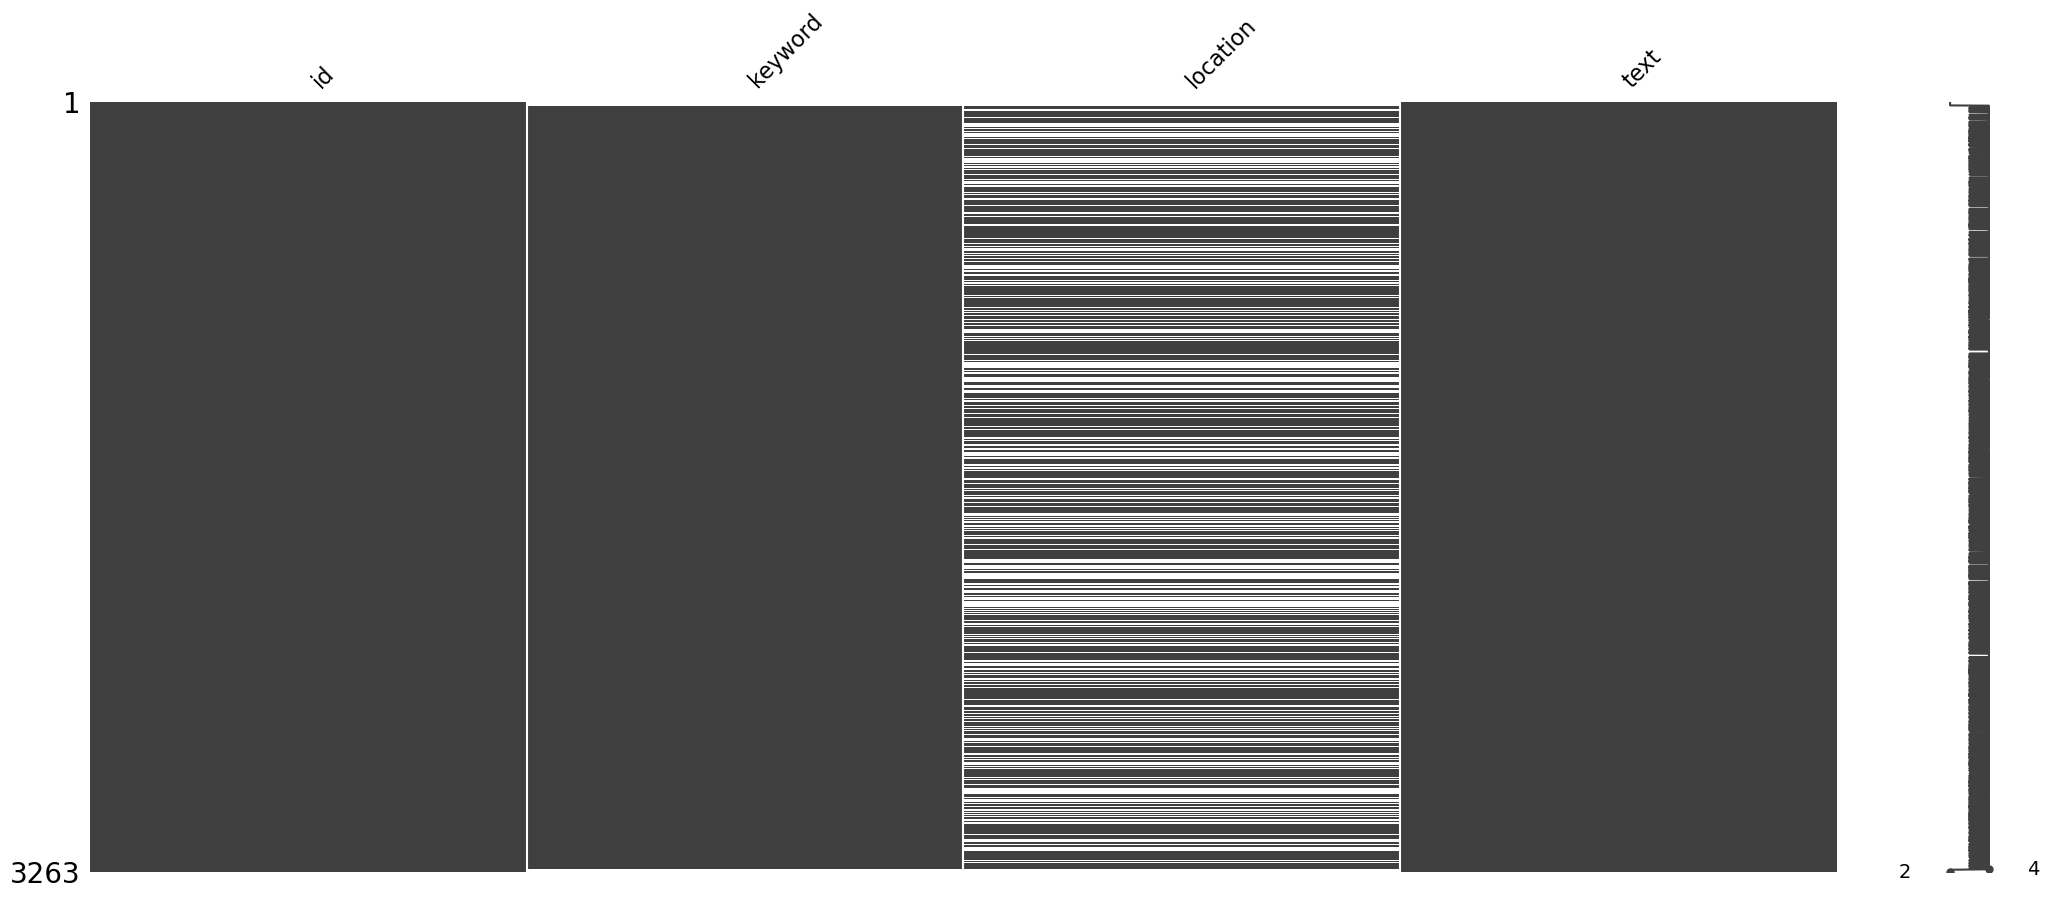

In [13]:
msno.matrix(df_test)

<AxesSubplot:>

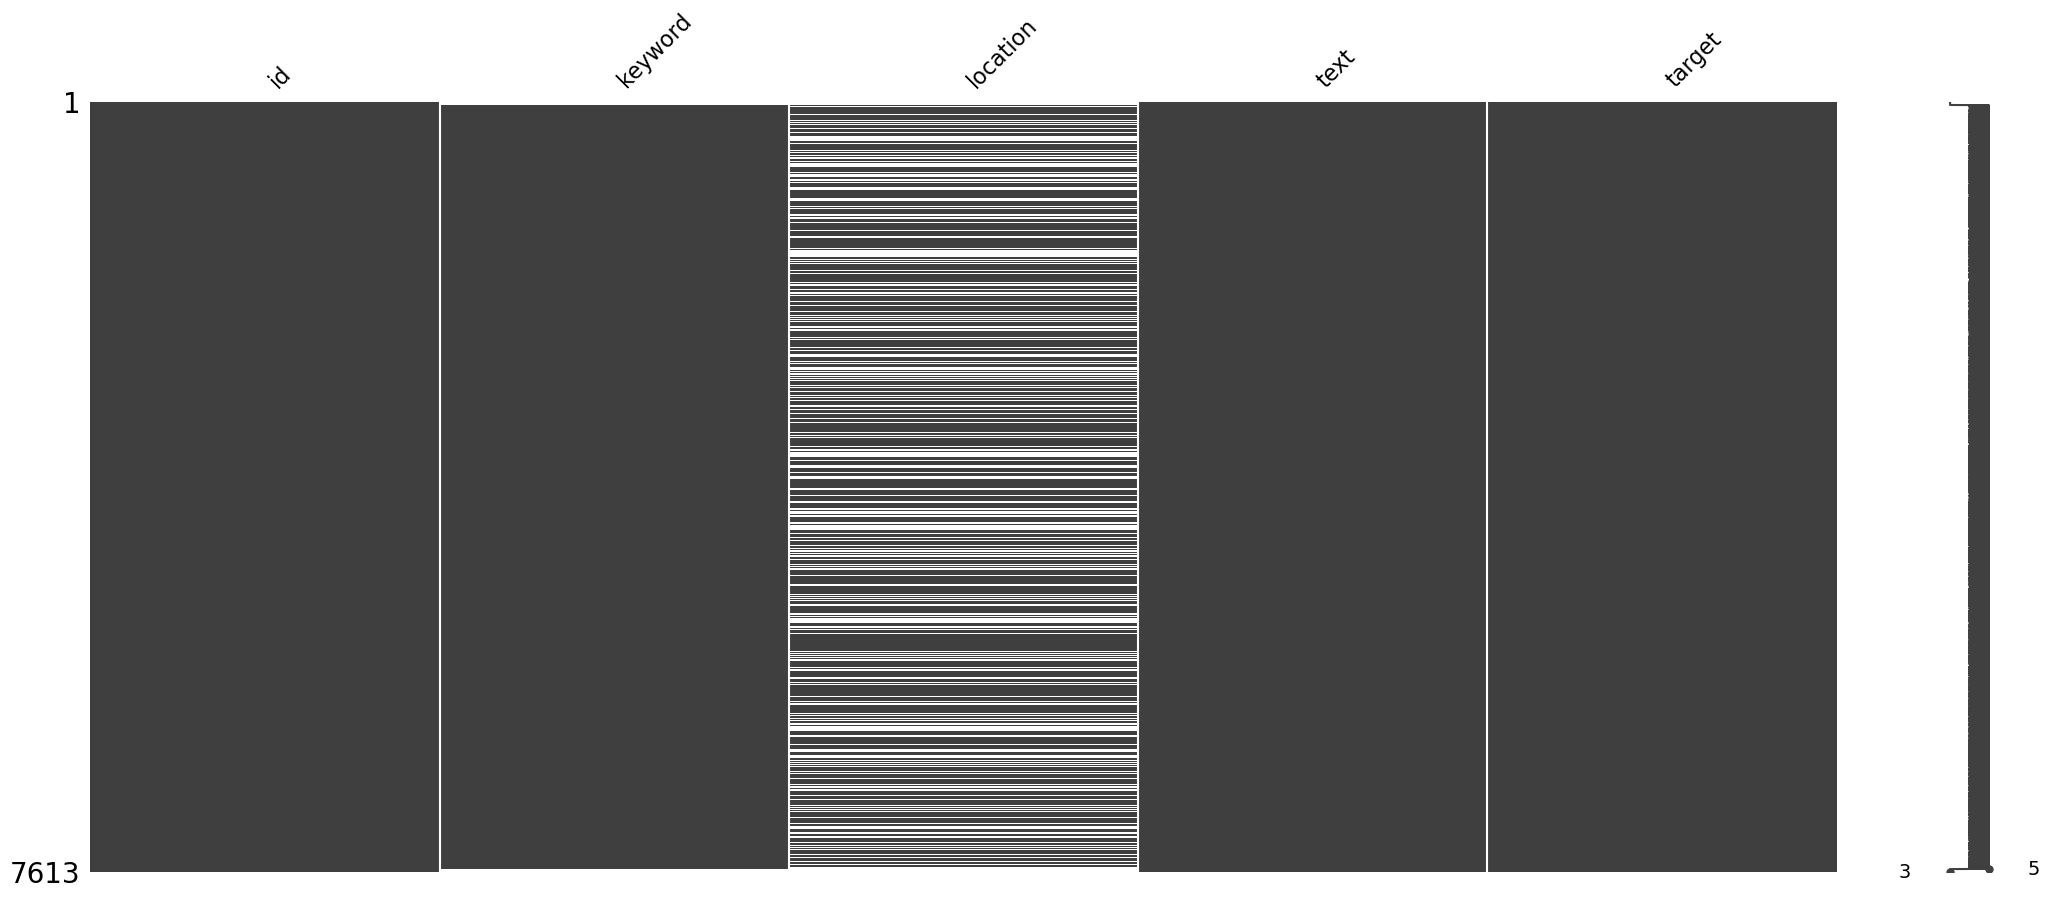

In [14]:
msno.matrix(df_train)

In [15]:
df_test.location.describe()

count         2158
unique        1602
top       New York
freq            38
Name: location, dtype: object

In [16]:
df_train.location.describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [48]:
duplicates_df_test = df_test[df_test.duplicated()]
duplicates_df_test

,id,keyword,location,text,cleaned_tweet,tweet_length_chars,tweet_length_words,stop_words_count


In [50]:
duplicates_df_train = df_train[df_train.duplicated()]
duplicates_df_train

,id,keyword,location,text,target


il ne semble pas avoir de doublon 

In [19]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [20]:
def clean_tweet(text):
    try:
        tokens = word_tokenize(text)
        tokens = [ps.stem(w) for w in tokens if not w.lower() in stop_words]
        cleaned_tweet = ' '.join(tokens)
        return cleaned_tweet
    except Exception as e:
        print("Error:", e)

In [21]:
df_test['cleaned_tweet'] = df_test['text'].apply(clean_tweet)

In [51]:
df_train['cleaned_tweet'] = df_train['text'].apply(clean_tweet)

In [22]:
df_test = df_test.dropna(subset=['cleaned_tweet'])
df_test

,id,keyword,location,text,cleaned_tweet
0,0,NaN,NaN,Just happened a terrible car crash,happen terribl car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","heard # earthquak differ citi , stay safe ever..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","forest fire spot pond , gees flee across stree..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalyps light . # spokan # wildfir
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquak safeti lo angel ûò safeti fasten xrwn
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri wors last hurrican . citi & amp ; 3ot...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derail chicago http : //t.co/utbxlc...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issu hazard weather outlook ( hwo ) http :...


In [52]:
df_train = df_train.dropna(subset=['cleaned_tweet'])
df_train

,id,keyword,location,text,target,cleaned_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason # earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask . canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask 'shelter place ' notifi offic . evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 peopl receiv # wildfir evacu order cali..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi # alaska smoke # wildfir p...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridg collaps nearbi home...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@ aria_ahrari @ thetawniest control wild fire ...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m1.94 [ 01:04 utc ] ? 5km volcano hawaii . htt...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,polic investig e-bik collid car littl portug ....


In [23]:
df_test['cleaned_tweet'] = df_test['cleaned_tweet'].astype(str)
df_test.cleaned_tweet

0                                happen terribl car crash
1       heard # earthquak differ citi , stay safe ever...
2       forest fire spot pond , gees flee across stree...
3                    apocalyps light . # spokan # wildfir
4                   typhoon soudelor kill 28 china taiwan
                              ...                        
3258     earthquak safeti lo angel ûò safeti fasten xrwn
3259    storm ri wors last hurrican . citi & amp ; 3ot...
3260    green line derail chicago http : //t.co/utbxlc...
3261    meg issu hazard weather outlook ( hwo ) http :...
3262    # cityofcalgari activ municip emerg plan . # y...
Name: cleaned_tweet, Length: 3263, dtype: object

In [53]:
df_train['cleaned_tweet'] = df_train['cleaned_tweet'].astype(str)
df_train.cleaned_tweet

0             deed reason # earthquak may allah forgiv us
1                  forest fire near la rong sask . canada
2       resid ask 'shelter place ' notifi offic . evac...
3       13,000 peopl receiv # wildfir evacu order cali...
4       got sent photo rubi # alaska smoke # wildfir p...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    @ aria_ahrari @ thetawniest control wild fire ...
7610    m1.94 [ 01:04 utc ] ? 5km volcano hawaii . htt...
7611    polic investig e-bik collid car littl portug ....
7612    latest : home raze northern california wildfir...
Name: cleaned_tweet, Length: 7613, dtype: object

In [57]:
wordcloud_test = WordCloud(width=800, height=500, random_state=21,background_color='white').generate(' '.join(df_test['cleaned_tweet'].tolist()))

In [58]:
wordcloud = WordCloud(width=800, height=500, random_state=21,background_color='white').generate(' '.join(df_train['cleaned_tweet'].tolist()))

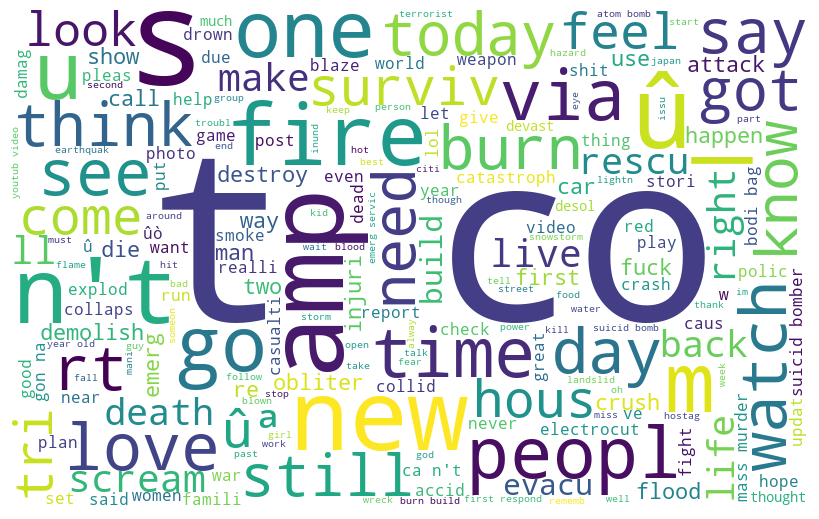

In [59]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_test)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

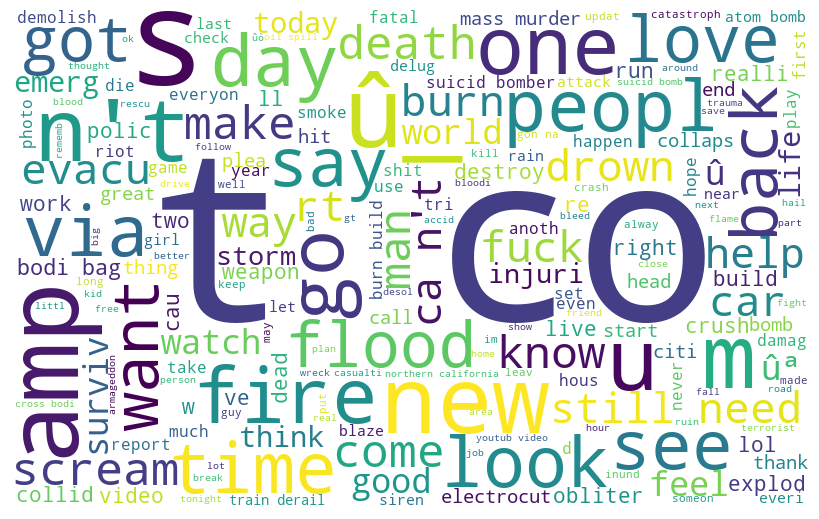

In [60]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

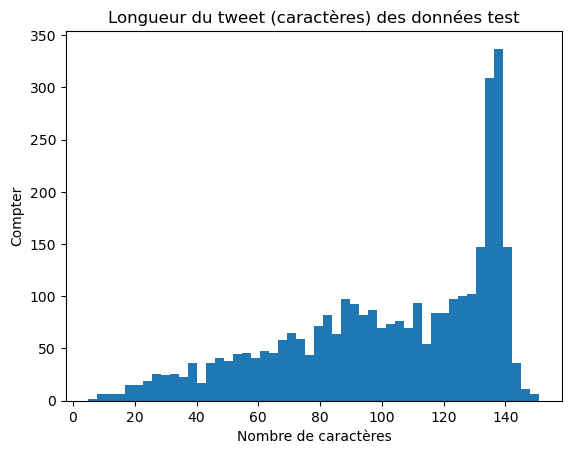

In [61]:
df_test['tweet_length_chars'] = df_test['text'].apply(len)
df_test['tweet_length_words'] = df_test['text'].apply(lambda x: len(word_tokenize(x)))
plt.hist(df_test['tweet_length_chars'], bins=50)
plt.title('Longueur du tweet (caractères) des données test')
plt.xlabel('Nombre de caractères')
plt.ylabel('Compter')
plt.show()

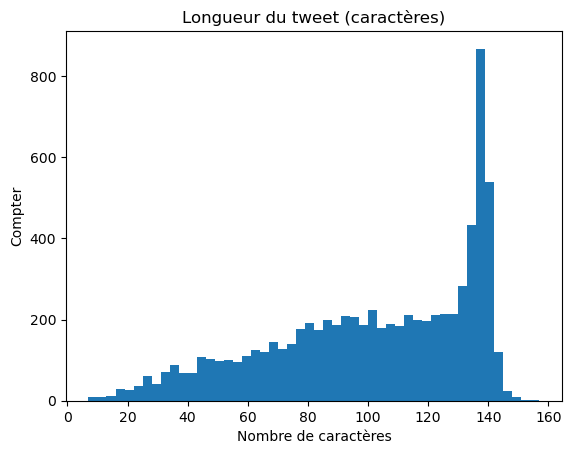

In [62]:
df_train['tweet_length_chars'] = df_train['text'].apply(len)
df_train['tweet_length_words'] = df_train['text'].apply(lambda x: len(word_tokenize(x)))
plt.hist(df_train['tweet_length_chars'], bins=50)
plt.title('Longueur du tweet (caractères)')
plt.xlabel('Nombre de caractères')
plt.ylabel('Compter')
plt.show()

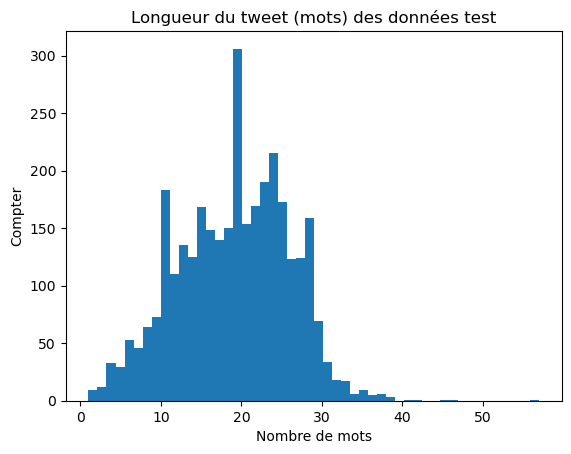

In [63]:
plt.hist(df_test['tweet_length_words'], bins=50)
plt.title('Longueur du tweet (mots) des données test')
plt.xlabel('Nombre de mots')
plt.ylabel('Compter')
plt.show()

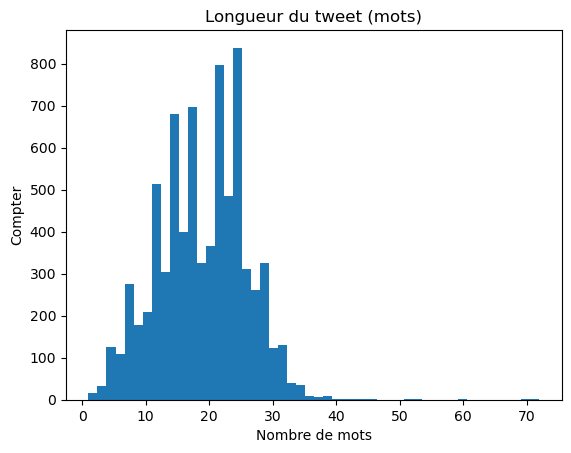

In [64]:
plt.hist(df_train['tweet_length_words'], bins=50)
plt.title('Longueur du tweet (mots)')
plt.xlabel('Nombre de mots')
plt.ylabel('Compter')
plt.show()

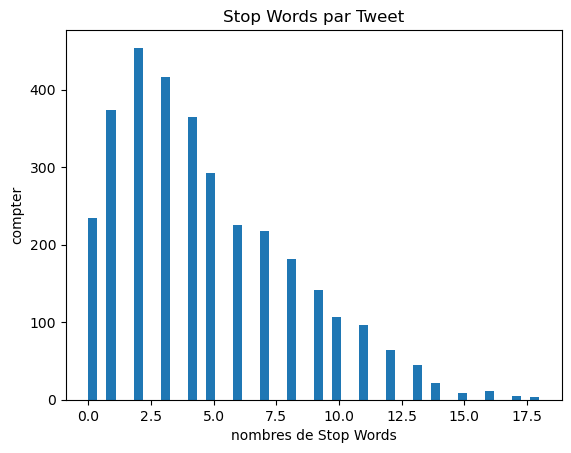

In [45]:
df_test['stop_words_count'] = df_test['text'].apply(lambda x: len([word for word in word_tokenize(x.lower()) if word in stop_words]))
plt.hist(df_test['stop_words_count'], bins=50)
plt.title('Stop Words par Tweet')
plt.xlabel('nombres de Stop Words')
plt.ylabel('compter')
plt.show()

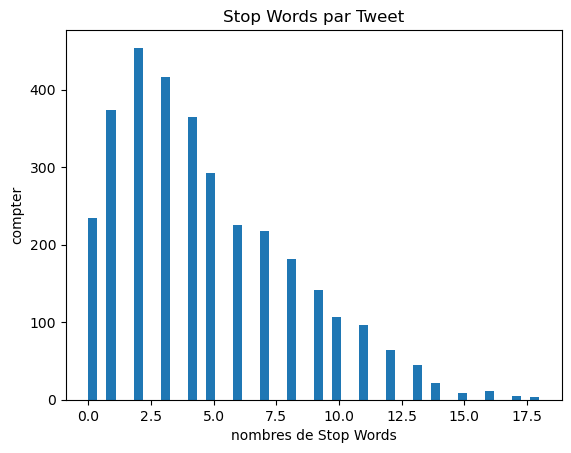

In [45]:
df_train['stop_words_count'] = df_train['text'].apply(lambda x: len([word for word in word_tokenize(x.lower()) if word in stop_words]))
plt.hist(df_train['stop_words_count'], bins=50)
plt.title('Stop Words par Tweet')
plt.xlabel('nombres de Stop Words')
plt.ylabel('compter')
plt.show()

In [46]:
df_test

,id,keyword,location,text,cleaned_tweet,tweet_length_chars,tweet_length_words,stop_words_count
0,0,NaN,NaN,Just happened a terrible car crash,happen terribl car crash,34,6,2
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","heard # earthquak differ citi , stay safe ever...",64,12,2
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","forest fire spot pond , gees flee across stree...",96,22,11
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalyps light . # spokan # wildfir,40,7,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan,45,8,2
...,...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquak safeti lo angel ûò safeti fasten xrwn,55,8,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri wors last hurrican . citi & amp ; 3ot...,139,30,6
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derail chicago http : //t.co/utbxlc...,55,8,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issu hazard weather outlook ( hwo ) http :...,65,11,0
